<a href="https://colab.research.google.com/github/giorgiagandolfi/laboratory_of_bioinformatics1/blob/master/project_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *Import data*

In [1]:
from google.colab import files
uploaded=files.upload()

Saving jpred4.tsv to jpred4.tsv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('jpred4.tsv', sep="\t")
df

,DomainID,PDB,SCOPID,SCOPClass,Length,Suprekingdom,TaxaID,TaxaName
0,d1a12a_,1a12,b.69.5.1,All beta,401,eukaryota,9606,Homo sapiens
1,d1a1xa_,1a1x,b.63.1.1,All beta,106,eukaryota,9606,Homo sapiens
2,d1a62a1,1a62,a.140.3.1,All alpha,47,bacteria,469008,Escherichia coli BL21(DE3)
3,d1a9xa1,1a9x,a.92.1.1,All alpha,153,bacteria,562,Escherichia coli
4,d1acoa1,1aco,c.8.2.1,Alpha and beta (a/b),226,eukaryota,9913,Bos taurus
...,...,...,...,...,...,...,...,...
1343,e1n13.1B,1n13,d.155.1.2,Alpha and beta (a+b),112,archaea,2190,Methanocaldococcus jannaschii
1344,e1qd6.1C,1qd6,f.4.2.1,Membrane and cell surface proteins and peptides,240,bacteria,562,Escherichia coli
1345,e1qqp.12,1qqp,b.121.4.1,All beta,216,viruses,12110,Foot-and-mouth disease virus
1346,e1qtn.1A,1qtn,c.17.1.1,Alpha and beta (a/b),152,eukaryota,9606,Homo sapiens


###**The distribution of domain lengths**

In [ ]:
import seaborn as sns

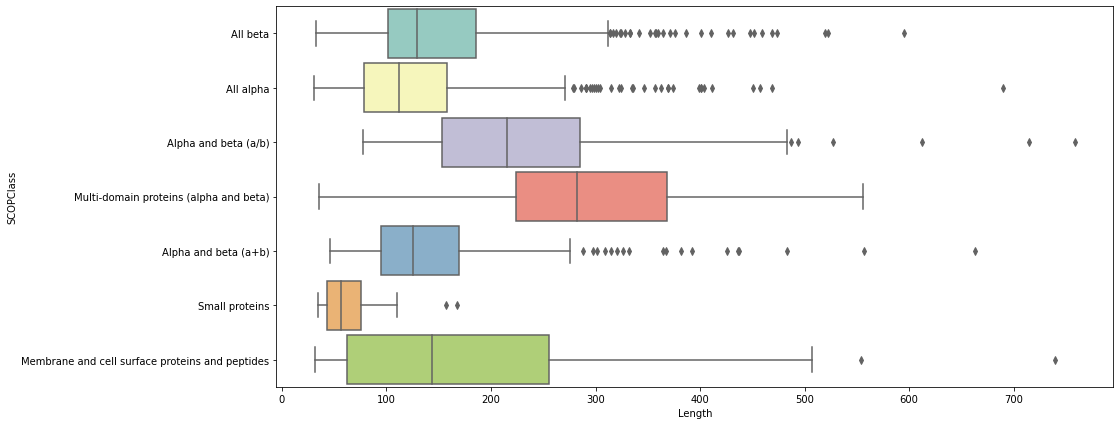

In [5]:
plt.figure(figsize=(15,7))
sns.boxplot(x=df["Length"],y=df["SCOPClass"],width=0.9,palette="Set3")
#add distributions according to scop class

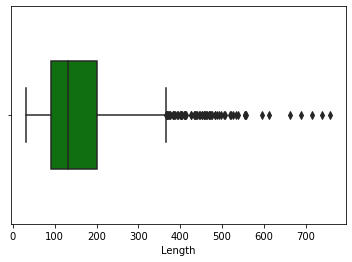

In [6]:
sns.boxplot(x=df["Length"],width=0.5, color="Green")

Text(0.5, 1.0, 'Distribution of domain length')

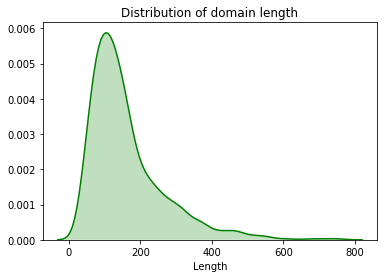

In [7]:
sns.distplot(df.Length, hist=False,kde_kws={'shade':True}, color="Green")
plt.title("Distribution of domain length")

### **The relative abundance of secondary structure conformations**

In [8]:
import numpy as np

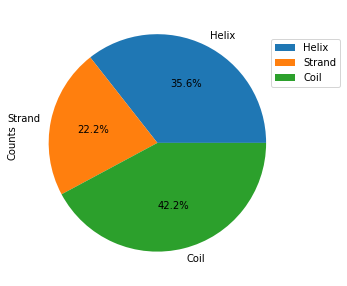

In [9]:
df_relabundance= pd.DataFrame({'Counts': [77742,48588,92091]},
                  index=['Helix','Strand','Coil'])
df_relabundance.plot.pie(y='Counts', figsize=(5, 5), autopct="%1.1f%%",).legend(bbox_to_anchor = (0.90,0.90))


### **Comparative amino-acid composition**

In [10]:
import matplotlib.pyplot as plt

In [11]:
from google.colab import files
uploaded=files.upload()

Saving ordered_frequencies.CSV to ordered_frequencies.CSV


In [ ]:
final_freq=pd.read_csv('ordered_frequencies.CSV',sep=';')
final_freq

Text(0, 0.5, 'Frequency')

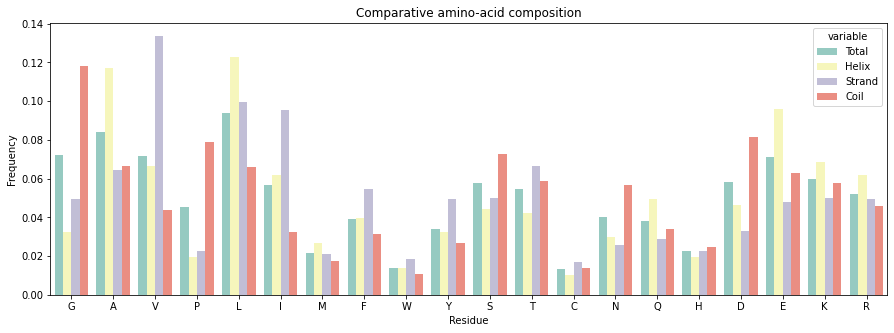

In [13]:
plt.figure(figsize=(15,5))
result_fin=pd.melt(final_freq, id_vars =['Residue'], value_vars =["Total","Helix","Strand","Coil"])
sns.barplot(x="Residue",y="value",hue="variable",data=result_fin,palette="Set3", )
plt.title("Comparative amino-acid composition")
plt.ylabel('Frequency')
#plt.show()
#plt.legend(('apolar(GAVPLIM)', 'aromatic(FWY)', 'polar(STCNQH','charged(DEKR)'))
#we can compare these propensity with established propensity scales using ProtScale or AAIndex
#https://web.expasy.org/protscale/
#https://www.genome.jp/aaindex/ 
#cluster together different residues order residues to better discuss propensity


### **Taxonomic classification**

#### Superkigdom

In [ ]:
superkind_counts=df['Suprekingdom'].value_counts()
df_superkind_counts=superkind_counts.rename_axis("superkingdom").to_frame("counts")
df_superkind_counts
#comparison with https://www.uniprot.org/statistics/Swiss-Prot

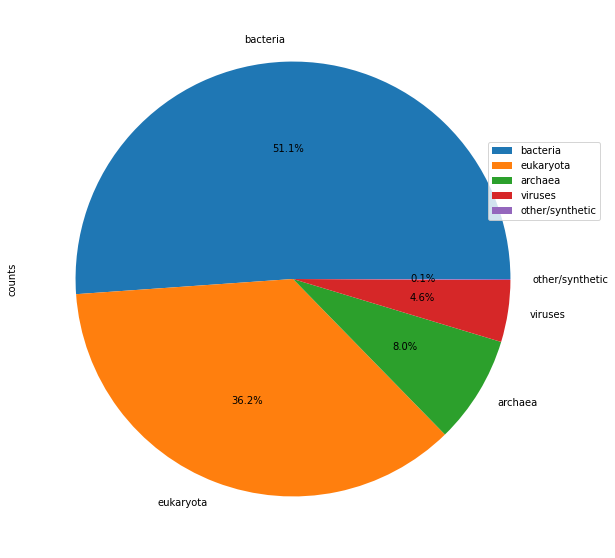

In [15]:
df_superkind_counts.plot.pie(y="counts",autopct="%1.1f%%",figsize=(10,10)).legend(bbox_to_anchor = (0.85,0.60))

#### Species

In [ ]:
species_counts=df['TaxaName'].value_counts()
df_species_counts=species_counts.rename_axis("species").to_frame("counts")
df_species_counts

In [ ]:
top10_species=df_species_counts.head(10)
top10_species

In [ ]:
sns.countplot(x="counts", data=top10_species)

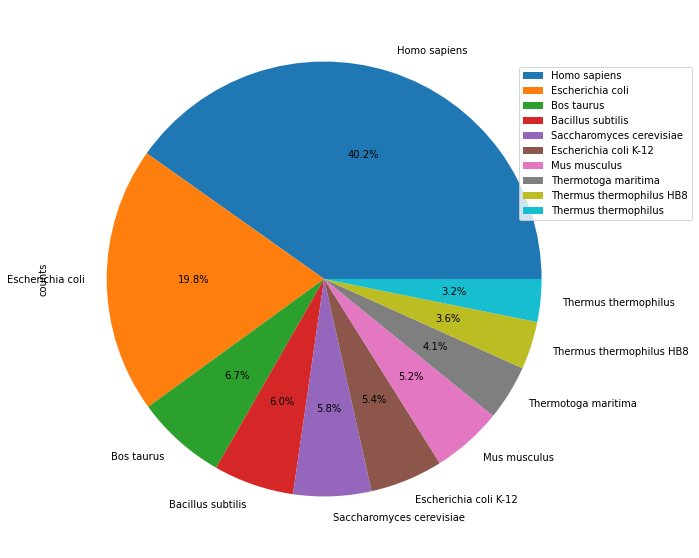

In [19]:
top10_species.plot.pie(y="counts",autopct="%1.1f%%",figsize=(10,10)).legend(bbox_to_anchor = (0.85,0.60))

### **Structural classification (SCOP class)**

In [20]:
secstr_counts=df['SCOPClass'].value_counts()
#secstr_counts

In [ ]:
df_secstr_counts=secstr_counts.rename_axis("secondary str").to_frame("counts")
df_secstr_counts

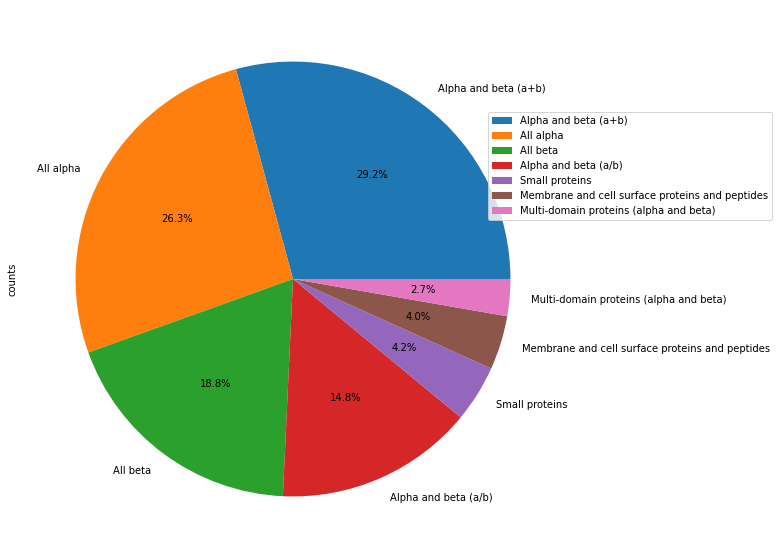

In [22]:
df_secstr_counts.plot.pie(y="counts",autopct="%1.1f%%",figsize=(10,10)).legend(bbox_to_anchor = (0.85,0.60))